<a href="https://colab.research.google.com/github/ChecinskiBartlomiej/UM/blob/main/UM_hw_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment – Adversarial Examples**

In this assignment, you will explore how small (invisible to humans) changes to real digits can _fool_ the CNN into misclassifying them, even though the changes are imperceptible to humans.



## Task 1 – CNN Dreams: Last Homework Assignment Revisited

Re-run the input optimization process (for NN dreams) from the previous MLP-class homework assignment, but this time using the **LeNet-5 CNN model** we trained in this class.


1. Starting from ten random noise images, optimize the input so that each image is classified with high confidence as one of the digits 0 through 9.
2. Include an **L2 penalty** on the input to keep the images visually closer to realistic digits. Use a range of penalty strengths (e.g., $\lambda_{l2}$ = 0, and then 0.01 through 10.0).
3. Compare the generated images (with and without L2 penalty) to those generated by the MLP:
   - Are they more or less readable?
   - Do they resemble real MNIST digits more closely or less?
   - Why do you think that happens? Consider the CNN’s inductive biases and architectural properties.

Use `cross_entropy_loss + lambda_l2 * input.pow(2).mean()` as your objective.

Reuse your code: visualize confidence evolution during optimization and generate image grids and (optionally) animations showing how the inputs evolve.


## Task 2 – Adversarial Examples: Fooling LeNet-5

This is the core focus of the assignment.

Using a batch of **real MNIST digits** (e.g., nine examples per class), craft **adversarial examples** by adding subtle, trained noise to the input images. Your goal is to:

- **Keep the human-perceived digit the same** (e.g., a "7" should still look like a "7"),
- But **cause LeNet-5 to misclassify it** – as every other class different from the original, hence nine examples per class.

### Objective
For each image $x$ and its true label $y$, learn a perturbation $\delta$ such that:

- $\text{LeNet5}(x + \delta) = y_{\text{wrong}} $,
- and $ \|\delta\|_2 $ is as small as possible (penalize large perturbations), to keep $x + \delta$ *look* like $x$ for humans.

### Optimization
Use gradient-based optimization on $\delta$ (the noise), while keeping the network weights frozen. Your loss might look like:

```
loss = cross_entropy(model(x + delta), target_wrong_class) +
       lambda_l2 * delta.pow(2).mean()
```

Tune the $\lambda_{l2}$ to find the best range.

### Deliverables for the Second Task
- Select some best examples, showing the original digit and its (correct) classification and the perturbed digit (hopefully, still looking the same to humans) and how it gets misclassified. Show them side by side.
- Report:
  - Success rate of attacks (it doesn't need to be very formal),
  - Effect of $\lambda_{l2}$ on visibility of the noise and success of misclassification,
  - Example image grids and confidence plots.



## Deliverables for the Homework Assignment
- A Google Colab notebook with:
  - Complete implementation for both tasks.
  - Visualizations and animations (animations are optional but encouraged).
  - Clear written analysis of your findings.
- Upload the notebook and results to your GitHub repository for the course.
- Include a link to the notebook and video (if applicable) in the `README.md`.
- In the notebook, include “Open in Colab” badge so it can be launched directly.

For the first task let's train digit recognizer on LeNet architecture and then optimize its input.

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 470kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.33MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.87MB/s]


Working on cuda
epoch: 0 batch: 0 current batch loss: 2.3295888900756836
epoch: 0 batch: 1 current batch loss: 2.3951117992401123
epoch: 0 batch: 2 current batch loss: 2.340542793273926
epoch: 0 batch: 3 current batch loss: 2.3056466579437256
epoch: 0 batch: 4 current batch loss: 2.3215510845184326
epoch: 0 batch: 5 current batch loss: 2.321685314178467
epoch: 0 batch: 6 current batch loss: 2.3139047622680664
epoch: 0 batch: 7 current batch loss: 2.3104047775268555
epoch: 0 batch: 8 current batch loss: 2.3044612407684326
epoch: 0 batch: 9 current batch loss: 2.3011534214019775
epoch: 0 batch: 10 current batch loss: 2.3033640384674072
epoch: 0 batch: 11 current batch loss: 2.3098535537719727
epoch: 0 batch: 12 current batch loss: 2.3072965145111084
epoch: 0 batch: 13 current batch loss: 2.30643367767334
epoch: 0 batch: 14 current batch loss: 2.301858425140381
epoch: 0 batch: 15 current batch loss: 2.303311586380005
epoch: 0 batch: 16 current batch loss: 2.2990458011627197
epoch: 0 batch

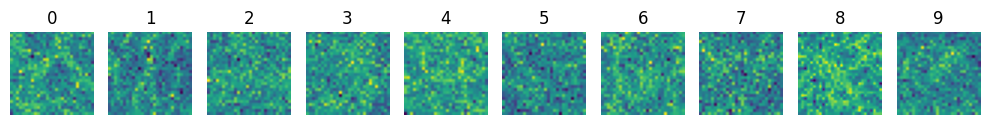

Finished training with lambda = 0
Training with lambda = 0.001
iteration: 0 current loss: 5.861238956451416
iteration: 1000 current loss: 0.005626576021313667
iteration: 2000 current loss: 0.00280001200735569
iteration: 3000 current loss: 0.0020328389946371317
iteration: 4000 current loss: 0.001666494645178318
iteration: 5000 current loss: 0.0014605240430682898
iteration: 6000 current loss: 0.0013221143744885921
iteration: 7000 current loss: 0.0012182804057374597
iteration: 8000 current loss: 0.0011305497027933598
iteration: 9000 current loss: 0.0010451659327372909
iteration: 10000 current loss: 0.0009585714433342218
iteration: 11000 current loss: 0.0008645667694509029
iteration: 12000 current loss: 0.000760338269174099
iteration: 13000 current loss: 0.0006469633080996573
iteration: 14000 current loss: 0.0005282596684992313
iteration: 15000 current loss: 0.00041125150164589286
iteration: 16000 current loss: 0.0003038961149286479
iteration: 17000 current loss: 0.00021329014271032065
ite

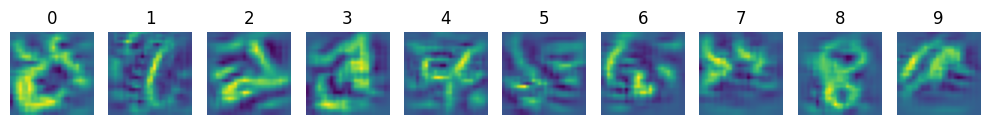

Finished training with lambda = 0.001
Training with lambda = 0.01
iteration: 0 current loss: 6.667044162750244
iteration: 1000 current loss: 0.01604652591049671
iteration: 2000 current loss: 0.012320466339588165
iteration: 3000 current loss: 0.011022889986634254
iteration: 4000 current loss: 0.010163181461393833
iteration: 5000 current loss: 0.00937174167484045
iteration: 6000 current loss: 0.008524367585778236
iteration: 7000 current loss: 0.007570261601358652
iteration: 8000 current loss: 0.006505232769995928
iteration: 9000 current loss: 0.005347434431314468
iteration: 10000 current loss: 0.004152359906584024
iteration: 11000 current loss: 0.0030019343830645084
iteration: 12000 current loss: 0.0019826602656394243
iteration: 13000 current loss: 0.001184516935609281
iteration: 14000 current loss: 0.0006454236572608352
iteration: 15000 current loss: 0.0003349927137605846
iteration: 16000 current loss: 0.0001909154816530645
iteration: 17000 current loss: 0.0001416902814526111
iteration:

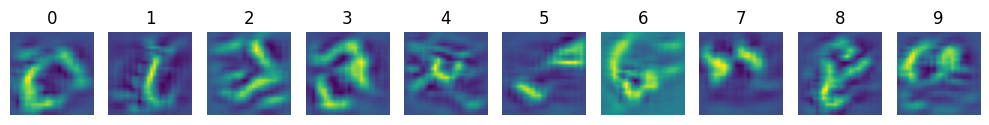

Finished training with lambda = 0.01
Training with lambda = 0.1
iteration: 0 current loss: 6.492602348327637
iteration: 1000 current loss: 0.09874271601438522
iteration: 2000 current loss: 0.08505755662918091
iteration: 3000 current loss: 0.07245531678199768
iteration: 4000 current loss: 0.05953801050782204
iteration: 5000 current loss: 0.0466952845454216
iteration: 6000 current loss: 0.0344829335808754
iteration: 7000 current loss: 0.023625191301107407
iteration: 8000 current loss: 0.0147694181650877
iteration: 9000 current loss: 0.008292818441987038
iteration: 10000 current loss: 0.00412749545648694
iteration: 11000 current loss: 0.0018574813148006797
iteration: 12000 current loss: 0.0008631882956251502
iteration: 13000 current loss: 0.0005358163616620004
iteration: 14000 current loss: 0.00045511347707360983
iteration: 15000 current loss: 0.0004409093235153705
iteration: 16000 current loss: 0.00043817717232741416
iteration: 17000 current loss: 0.00042679396574385464
iteration: 18000 

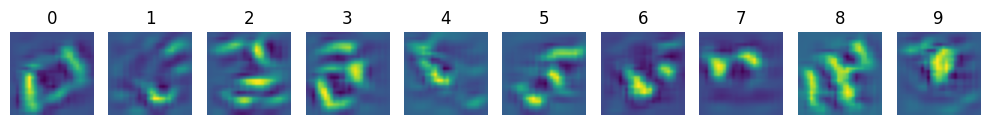

Finished training with lambda = 0.1
Training with lambda = 1.0
iteration: 0 current loss: 8.437799453735352
iteration: 1000 current loss: 0.7487045526504517
iteration: 2000 current loss: 0.48636889457702637
iteration: 3000 current loss: 0.291739821434021
iteration: 4000 current loss: 0.15824230015277863
iteration: 5000 current loss: 0.07565642148256302
iteration: 6000 current loss: 0.0313589870929718
iteration: 7000 current loss: 0.01161796972155571
iteration: 8000 current loss: 0.004506158642470837
iteration: 9000 current loss: 0.0026910591404885054
iteration: 10000 current loss: 0.0024154235143214464
iteration: 11000 current loss: 0.0023635760881006718
iteration: 12000 current loss: 0.0023536200169473886
iteration: 13000 current loss: 0.002353654708713293
iteration: 14000 current loss: 0.0023536409717053175
iteration: 15000 current loss: 0.0023536398075520992
iteration: 16000 current loss: 0.002353630494326353
iteration: 17000 current loss: 0.002353629097342491
iteration: 18000 curre

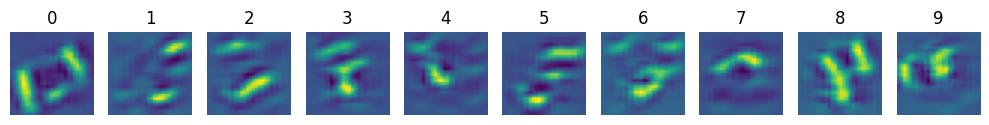

Finished training with lambda = 1.0
Training with lambda = 10.0
iteration: 0 current loss: 15.454061508178711
iteration: 1000 current loss: 3.387124538421631
iteration: 2000 current loss: 0.9110212326049805
iteration: 3000 current loss: 0.20243531465530396
iteration: 4000 current loss: 0.04446978121995926
iteration: 5000 current loss: 0.018963322043418884
iteration: 6000 current loss: 0.01591469533741474
iteration: 7000 current loss: 0.015576707199215889
iteration: 8000 current loss: 0.015537088736891747
iteration: 9000 current loss: 0.01553628034889698
iteration: 10000 current loss: 0.015536241233348846
iteration: 11000 current loss: 0.015536217018961906
iteration: 12000 current loss: 0.015536258928477764
iteration: 13000 current loss: 0.015536237508058548
iteration: 14000 current loss: 0.01553620770573616
iteration: 15000 current loss: 0.0155362319201231
iteration: 16000 current loss: 0.01553626824170351
iteration: 17000 current loss: 0.015536261722445488
iteration: 18000 current los

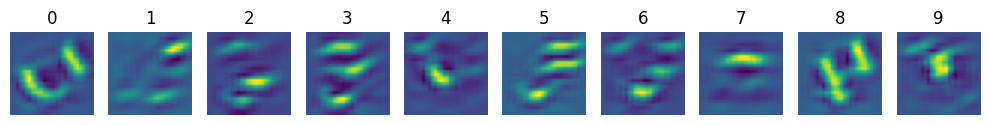

Finished training with lambda = 10.0


In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F


transform = torchvision.transforms.Compose(
    [ torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize((0.1307), (0.3081))])

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=2048,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1,
                                         shuffle=False)

class LeNet5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.sigmoid = torch.nn.Sigmoid()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2, stride=1)
        self.pool = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0, stride=1)
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(16*5*5, 120)
        self.linear2 = torch.nn.Linear(120,84)
        self.linear3 = torch.nn.Linear(84,10)

    def forward(self, x):      # (B, 1, 28, 28)
        x = self.conv1(x)      # (B, 6, 28, 28)
        x = self.sigmoid(x)    # (B, 6, 28, 28)
        x = self.pool(x)       # (B, 6, 14, 14)
        x = self.conv2(x)      # (B, 16, 10, 10)
        x = self.sigmoid(x)    # (B, 16, 10, 10)
        x = self.pool(x)       # (B, 16, 5, 5)
        x = self.flatten(x)    # (B, 16*5*5)
        x = self.linear1(x)    # (B, 120)
        x = self.sigmoid(x)    # (B, 120)
        x = self.linear2(x)    # (B, 84)
        x = self.sigmoid(x)    # (B, 84)
        x = self.linear3(x)    # (B, 10)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Working on {device}")

net = LeNet5().to(device)
optimizer = torch.optim.Adam(net.parameters(), 0.01)

# Trian digit recognizer.
net.train()
for epoch in range(16):

    for batch, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()
        batch_outputs = net(batch_inputs)
        loss = F.cross_entropy(batch_outputs, batch_labels, reduction = "mean")
        print("epoch:", epoch, "batch:", batch, "current batch loss:", loss.item())
        loss.backward()
        optimizer.step()

# Check accuracy on test data.
good = 0
wrong = 0

net.eval()
with torch.no_grad():
    for batch, data in enumerate(testloader):
        datapoint, label = data

        prediction = net(datapoint.to(device))
        classification = torch.argmax(prediction)

        if classification.item() == label.item():
            good += 1
        else:
            wrong += 1

print("accuracy = ", good/(good+wrong))

# Function for optimizing inputs of digit recognizer.
def train(l, iterations):
    samples = torch.randn(10, 1, 28, 28, device=device, requires_grad=True)
    mean = torch.tensor(0.1307, device=device).view(1,1,1,1)
    std  = torch.tensor(0.3081, device=device).view(1,1,1,1)

    labels = torch.arange(10, device=device)
    optimizer2 = torch.optim.Adam([samples], 0.001)
    net.eval()
    for epoch in range(iterations):
        optimizer2.zero_grad()
        normed = (samples - mean) / std
        logits = net(normed)
        loss2 = torch.nn.functional.cross_entropy(logits, labels, reduction="mean") + l * samples.pow(2).mean()
        if epoch % 1000 == 0:
            print("iteration:", epoch, "current loss:", loss2.item())
        loss2.backward()
        optimizer2.step()
    return samples

# Function for plotting inputs of digit recognizer.
def plot_images(images):
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))
    for i, ax in enumerate(axes):
        img = images[i].squeeze().cpu().detach()
        ax.imshow(img)
        ax.set_title(f"{i}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Train and plot for different lambdas.
iterations = 30000
lambda_values = [0, 0.001, 0.01, 0.1, 1.0, 10.0]
for l in lambda_values:
    print(f"Training with lambda = {l}")
    images = train(l, iterations)
    plot_images(images)
    print(f"Finished training with lambda = {l}")

Compared to the models trained with an MLP, the CNN-generated digits are noticeably more readable and often resemble genuine handwriting. This improvement stems from the CNN's ability to exploit spatial relationships within the image, whereas an MLP—by flattening the pixels—effectively discards the two-dimensional structure and local dependencies that are crucial for visual tasks.

In the second task, I will select 90 distinct MNIST test images (9 examples of each digit from 0 to 9) and optimize an individual perturbation for each one. I will then optimize a perturbation tensor—one noise per example—so that, when added to these images, it causes the classifier to predict the wrong digit, even though each perturbed image remains visually indistinguishable from its original.

Training with lambda = 0
iter 000  misclas. rate =  0.0%   loss=12.050
iter 100  misclas. rate = 100.0%   loss=0.005
iter 200  misclas. rate = 100.0%   loss=0.002
iter 300  misclas. rate = 100.0%   loss=0.001
iter 400  misclas. rate = 100.0%   loss=0.001
iter 500  misclas. rate = 100.0%   loss=0.001
iter 600  misclas. rate = 100.0%   loss=0.001
iter 700  misclas. rate = 100.0%   loss=0.001
iter 800  misclas. rate = 100.0%   loss=0.001
iter 900  misclas. rate = 100.0%   loss=0.001

Final attack success rate: 100.0%


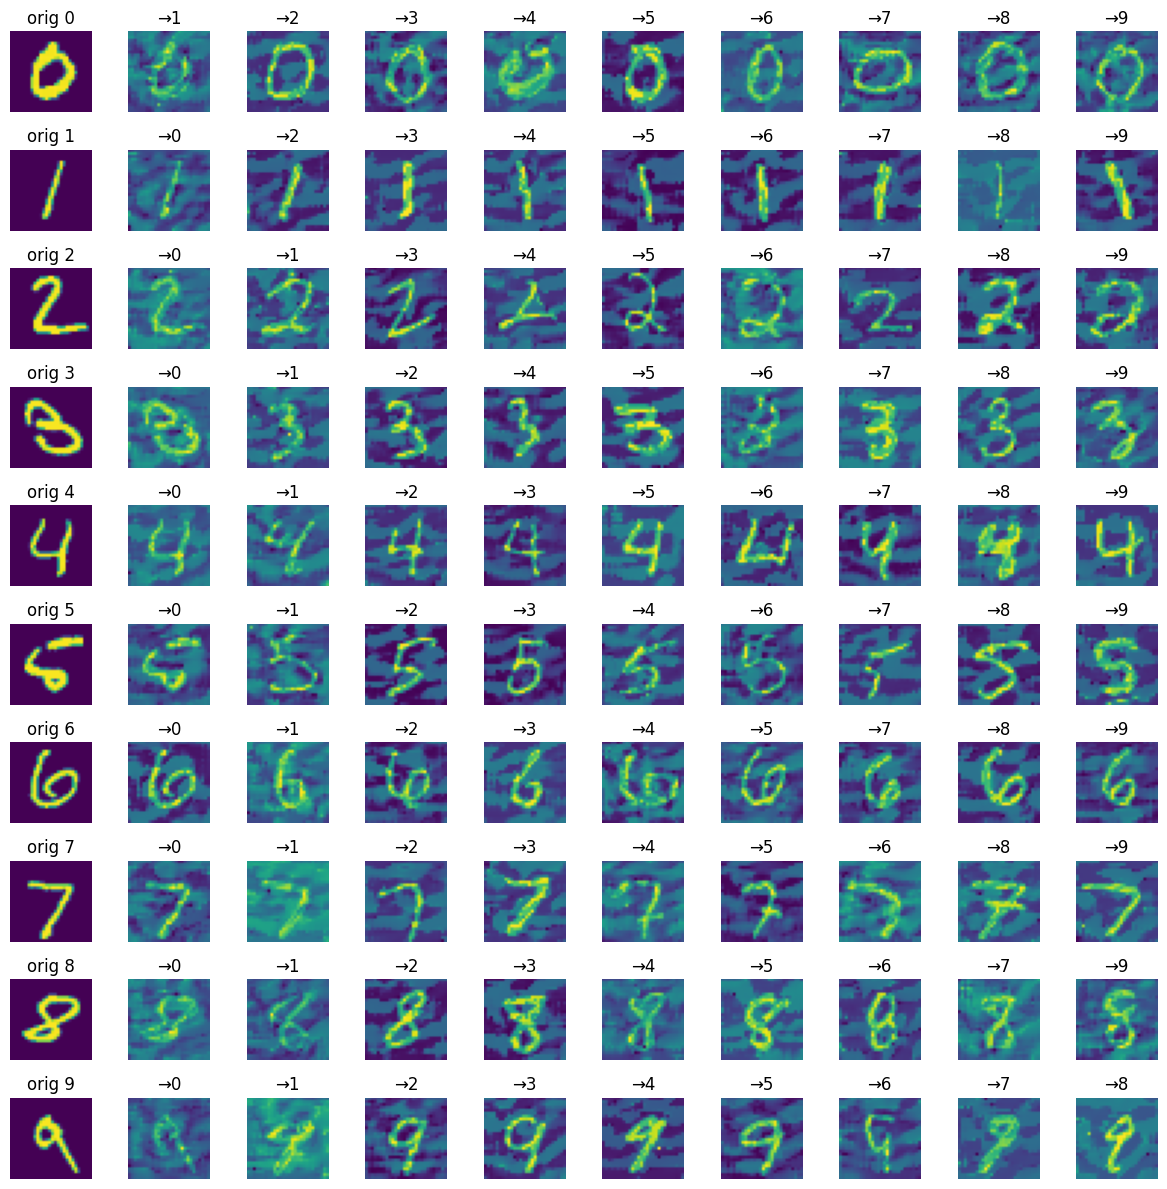

Finished training with lambda = 0
Training with lambda = 0.001
iter 000  misclas. rate =  0.0%   loss=12.050
iter 100  misclas. rate = 100.0%   loss=0.005
iter 200  misclas. rate = 100.0%   loss=0.003
iter 300  misclas. rate = 100.0%   loss=0.002
iter 400  misclas. rate = 100.0%   loss=0.002
iter 500  misclas. rate = 100.0%   loss=0.002
iter 600  misclas. rate = 100.0%   loss=0.001
iter 700  misclas. rate = 100.0%   loss=0.001
iter 800  misclas. rate = 100.0%   loss=0.001
iter 900  misclas. rate = 100.0%   loss=0.001

Final attack success rate: 100.0%


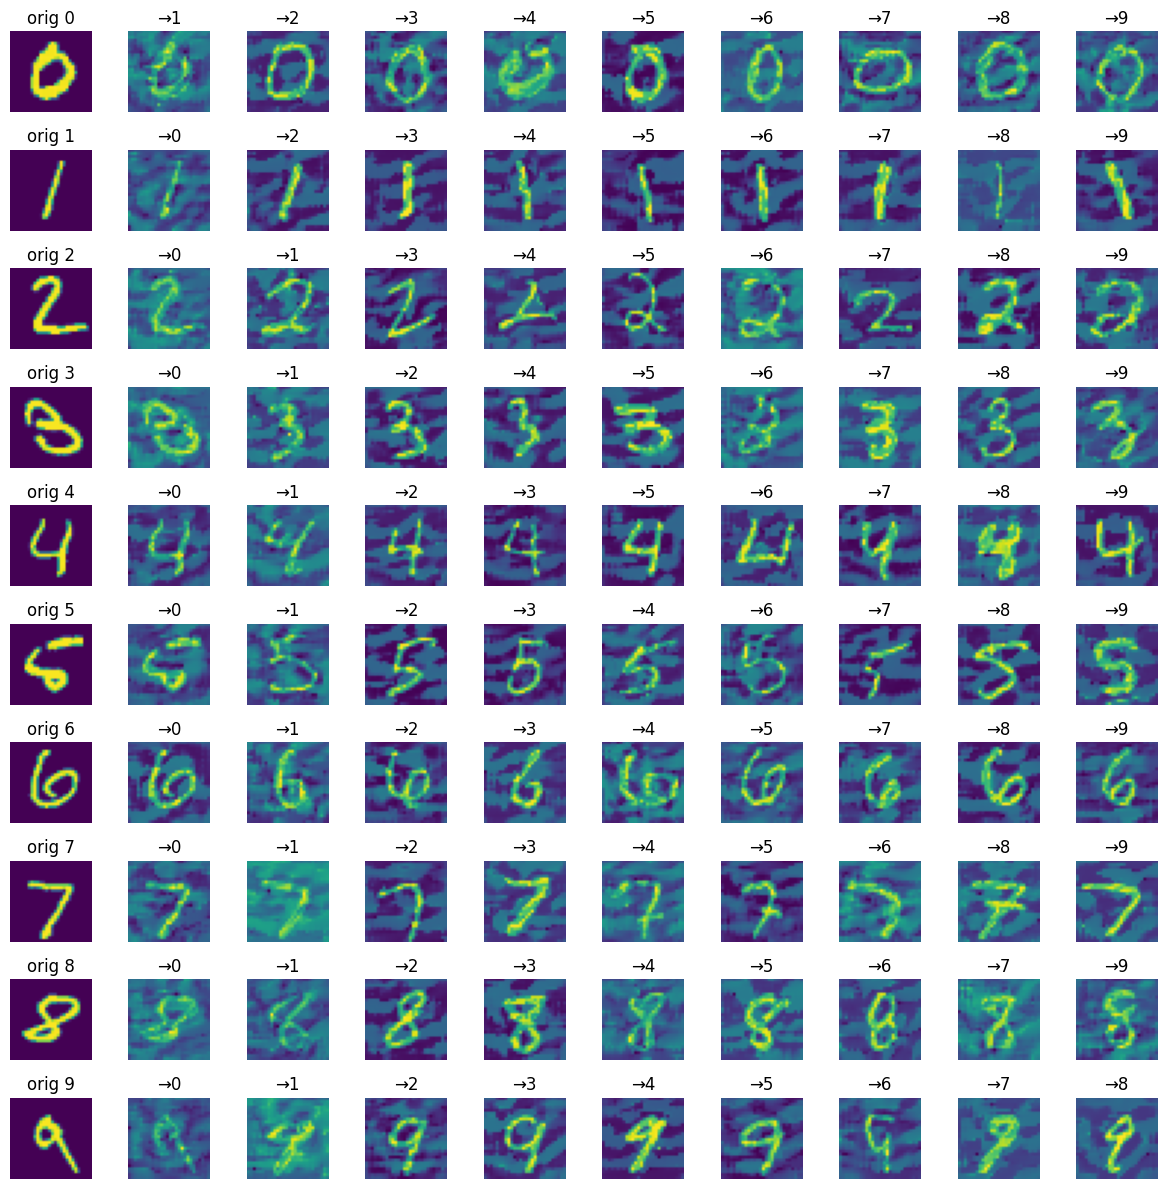

Finished training with lambda = 0.001
Training with lambda = 0.01
iter 000  misclas. rate =  0.0%   loss=12.050
iter 100  misclas. rate = 100.0%   loss=0.010
iter 200  misclas. rate = 100.0%   loss=0.007
iter 300  misclas. rate = 100.0%   loss=0.006
iter 400  misclas. rate = 100.0%   loss=0.006
iter 500  misclas. rate = 100.0%   loss=0.005
iter 600  misclas. rate = 100.0%   loss=0.005
iter 700  misclas. rate = 100.0%   loss=0.005
iter 800  misclas. rate = 100.0%   loss=0.004
iter 900  misclas. rate = 100.0%   loss=0.004

Final attack success rate: 100.0%


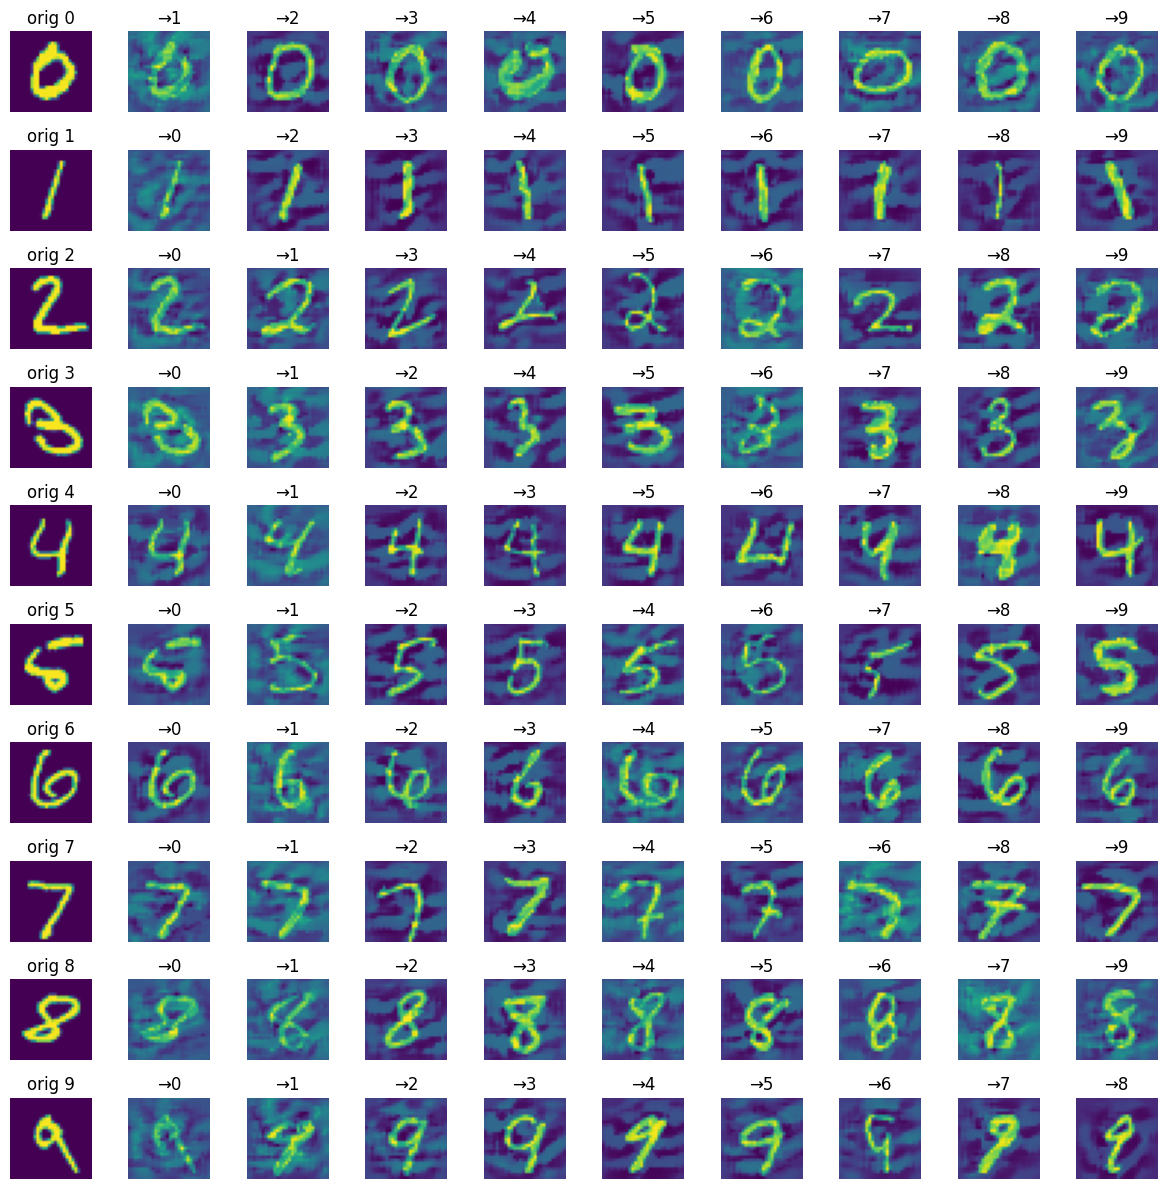

Finished training with lambda = 0.01
Training with lambda = 0.1
iter 000  misclas. rate =  0.0%   loss=12.050
iter 100  misclas. rate = 100.0%   loss=0.047
iter 200  misclas. rate = 100.0%   loss=0.034
iter 300  misclas. rate = 100.0%   loss=0.026
iter 400  misclas. rate = 100.0%   loss=0.020
iter 500  misclas. rate = 100.0%   loss=0.016
iter 600  misclas. rate = 100.0%   loss=0.014
iter 700  misclas. rate = 100.0%   loss=0.012
iter 800  misclas. rate = 100.0%   loss=0.011
iter 900  misclas. rate = 100.0%   loss=0.010

Final attack success rate: 100.0%


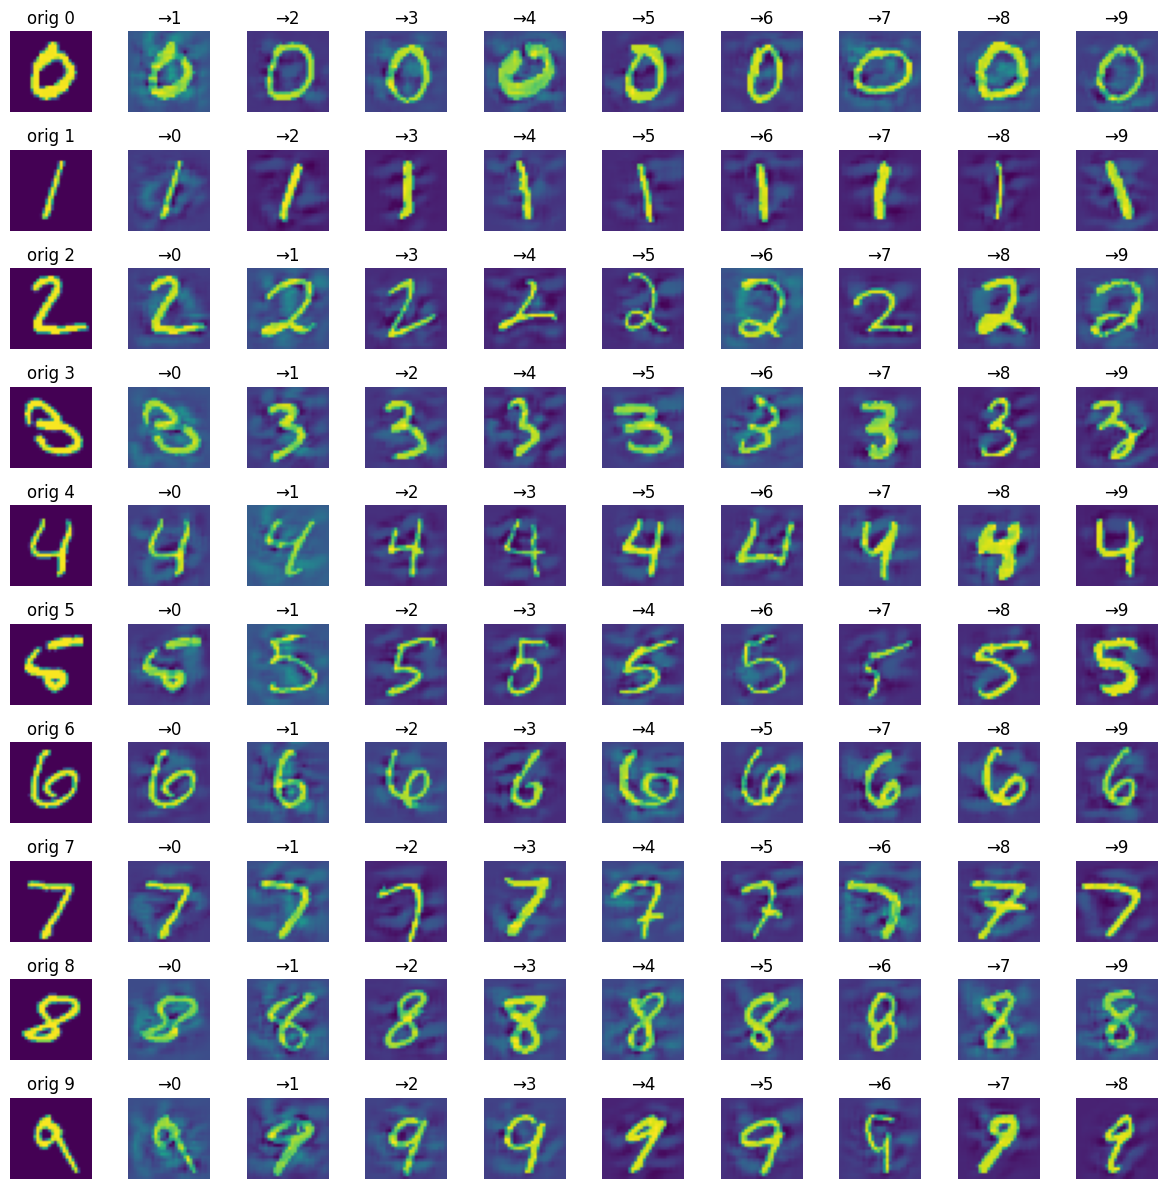

Finished training with lambda = 0.1
Training with lambda = 1.0
iter 000  misclas. rate =  0.0%   loss=12.050
iter 100  misclas. rate = 100.0%   loss=0.163
iter 200  misclas. rate = 100.0%   loss=0.077
iter 300  misclas. rate = 100.0%   loss=0.063
iter 400  misclas. rate = 100.0%   loss=0.059
iter 500  misclas. rate = 100.0%   loss=0.058
iter 600  misclas. rate = 100.0%   loss=0.057
iter 700  misclas. rate = 100.0%   loss=0.057
iter 800  misclas. rate = 100.0%   loss=0.057
iter 900  misclas. rate = 100.0%   loss=0.056

Final attack success rate: 100.0%


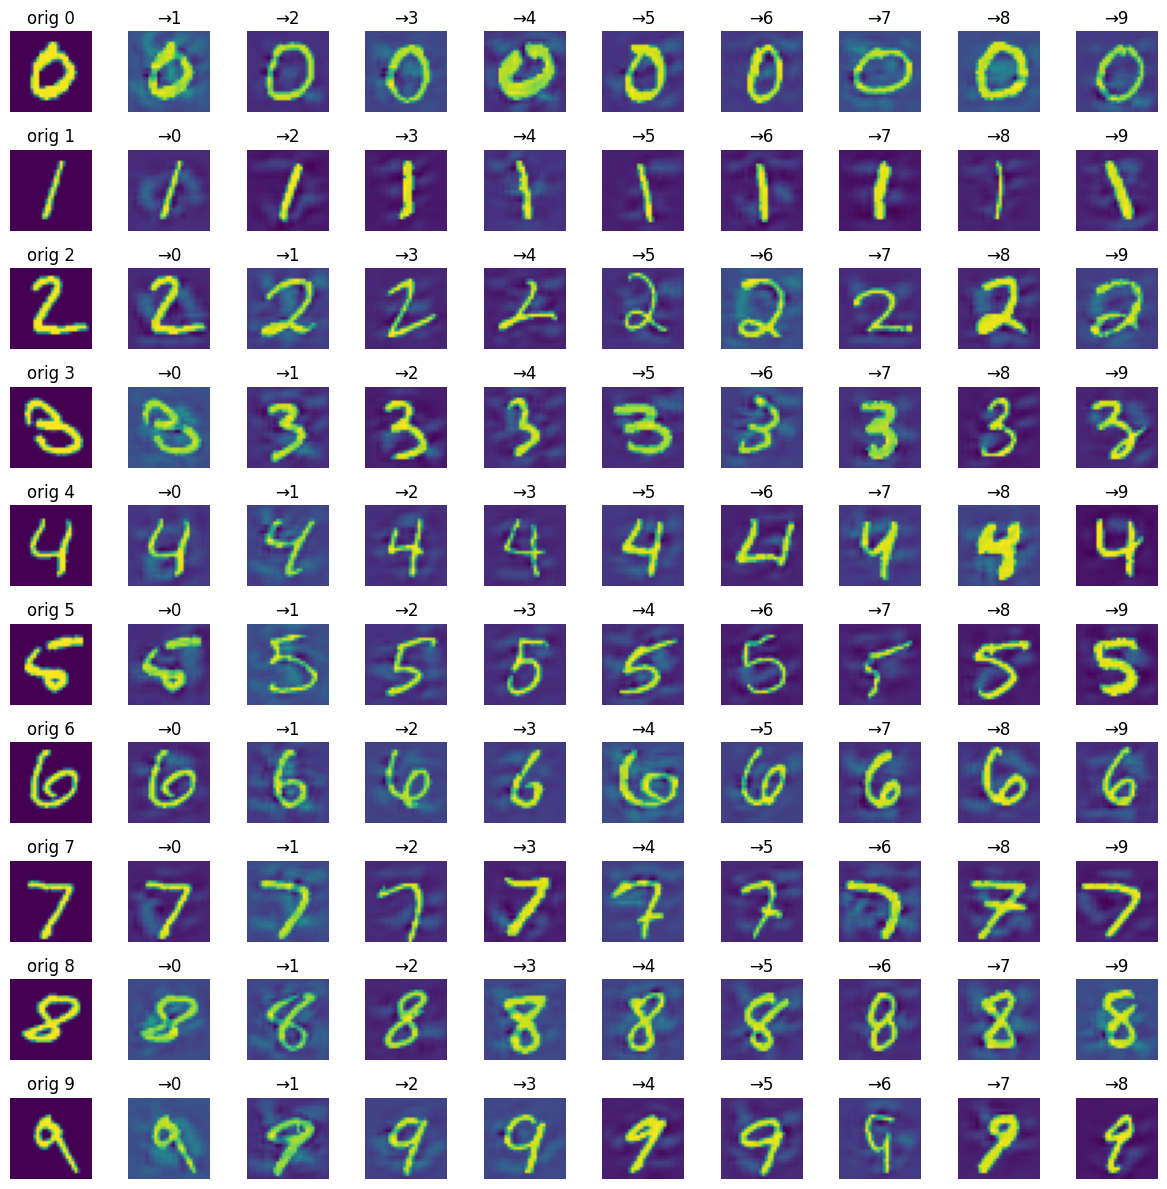

Finished training with lambda = 1.0
Training with lambda = 10.0
iter 000  misclas. rate =  0.0%   loss=12.050
iter 100  misclas. rate = 100.0%   loss=0.454
iter 200  misclas. rate = 100.0%   loss=0.438
iter 300  misclas. rate = 100.0%   loss=0.435
iter 400  misclas. rate = 100.0%   loss=0.435
iter 500  misclas. rate = 100.0%   loss=0.434
iter 600  misclas. rate = 100.0%   loss=0.433
iter 700  misclas. rate = 100.0%   loss=0.433
iter 800  misclas. rate = 100.0%   loss=0.433
iter 900  misclas. rate = 100.0%   loss=0.433

Final attack success rate: 100.0%


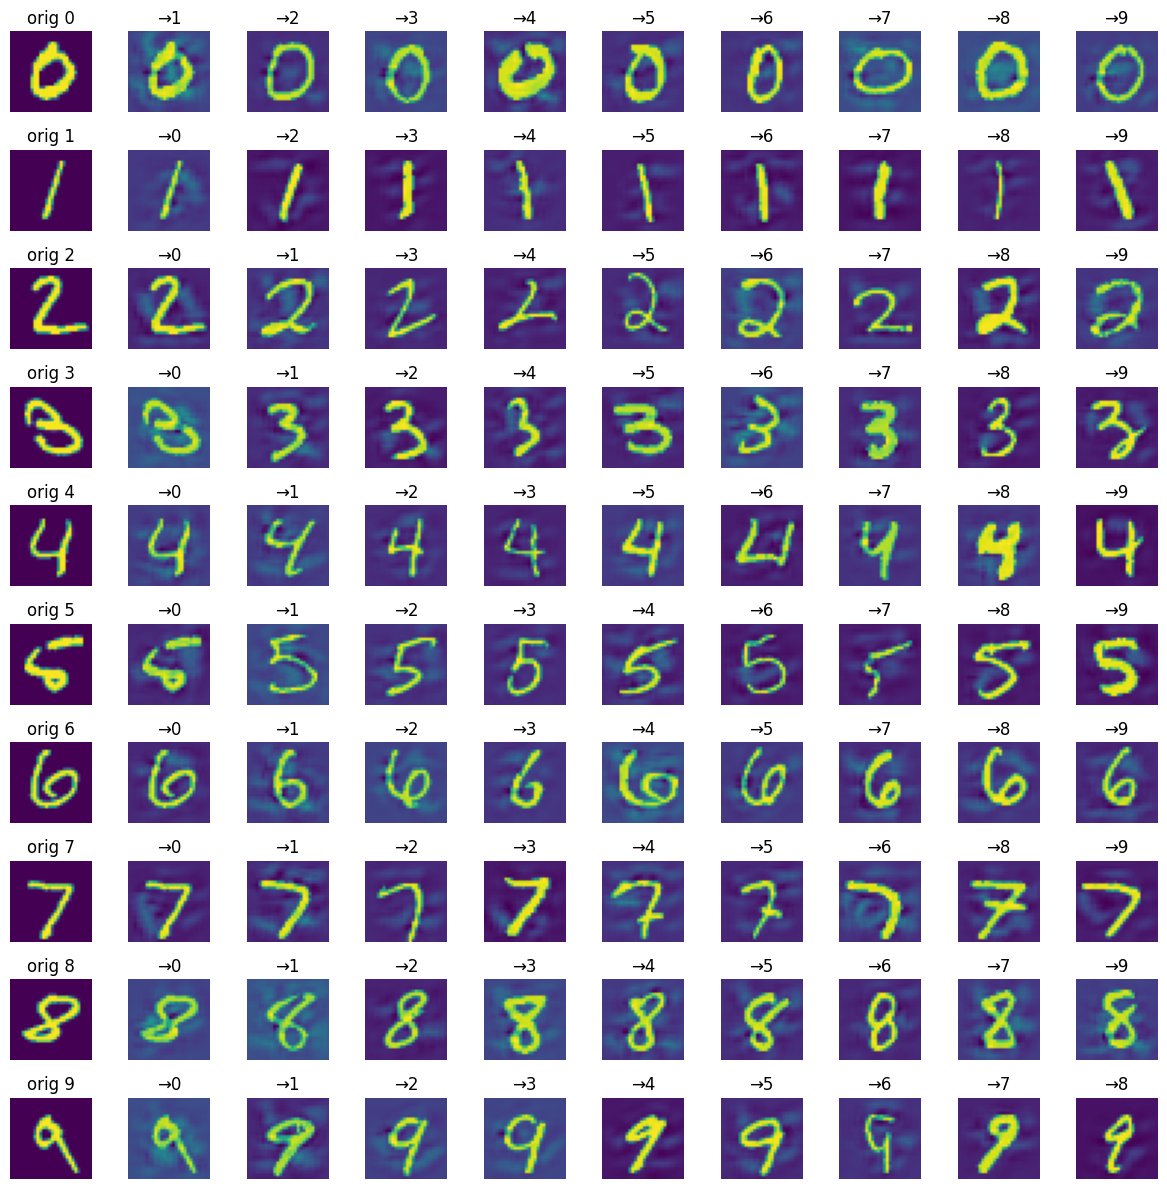

Finished training with lambda = 10.0


In [5]:
# Load 90 images.
picked = {i: [] for i in range(10)}
for img, lbl in testloader:
    c = lbl.item()
    img = img.squeeze(0)            # (1,1,28,28) --> (1,28,28)
    if len(picked[c]) < 9:
        picked[c].append(img)
    if all(len(picked[i]) == 9 for i in range(10)):
        break

originals = torch.cat([torch.stack(picked[i]) for i in range(10)], dim=0).to(device)  # (90,1,28,28)

# Build target‐label vector: for each true class i, nine wrong labels.
target = []
for true in range(10):
    wrongs = [j for j in range(10) if j != true]
    target += wrongs
target = torch.tensor(target, device=device, dtype=torch.long)  # (90,)

# Function for optimizing noises.
def train2(l, iterations):
  delta = torch.zeros_like(originals, requires_grad=True)
  opt = torch.optim.Adam([delta], lr=5e-2)
  for it in range(iterations):
    opt.zero_grad()
    logits = net(originals+delta)
    loss = F.cross_entropy(logits, target) + l * delta.pow(2).mean()
    loss.backward()
    opt.step()

    if it % 100 == 0:
        with torch.no_grad():
            preds = net(originals+delta).argmax(dim=1)
            acc   = (preds == target).float().mean().item()
        print(f"iter {it:03d}  misclas. rate = {acc*100:4.1f}%   loss={loss.item():.3f}")
  return delta

def plot_images2(originals, delta):
  originals_cpu = originals.detach().cpu()
  adv_images  = (originals + delta).detach().cpu()

  fig, axes = plt.subplots(10, 10, figsize=(12,12))
  for true in range(10):
    idx_orig = true * 9
    axes[true, 0].imshow(originals_cpu[idx_orig].squeeze())
    axes[true, 0].set_title(f"orig {true}")
    axes[true, 0].axis('off')
    for k in range(9):
      idx = true * 9 + k
      axes[true, k+1].imshow(adv_images[idx].squeeze())
      axes[true, k+1].set_title(f"→{target[idx].item()}")
      axes[true, k+1].axis('off')

  plt.tight_layout()
  plt.show()

# Train and plot for different lambdas.
iterations = 1000
for l in lambda_values:
    print(f"Training with lambda = {l}")
    delta = train2(l, iterations)
    # Final success rate and loss.
    with torch.no_grad():
      final_preds = net(originals+delta).argmax(dim=1)
      success = (final_preds == target).float().mean().item()
      print(f"\nFinal attack success rate: {success*100:.1f}%")

    plot_images2(originals, delta)
    print(f"Finished training with lambda = {l}")




All tested $\lambda$ values achieved a perfect ($100$%) attack success rate, and as $\lambda$ increases, the adversarial images appear progressively more realistic.